In [398]:
import missingno as mscno
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib

In [399]:
path = r"/Users/amanda/Documents/FIAP/projetos/chap1-phase4-agricultural-machine/documents/coletas.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   humidity          532 non-null    float64
 1   phsimulated       530 non-null    float64
 2   temperature       531 non-null    float64
 3   phosphorusstatus  531 non-null    object 
 4   potassiumstatus   532 non-null    object 
 5   shouldirrigate    532 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 25.1+ KB


,humidity,phsimulated,temperature,phosphorusstatus,potassiumstatus,shouldirrigate
0,0.0,3.42,80.0,P,P,1
1,0.0,3.42,80.0,P,P,1
2,0.0,3.42,80.0,P,P,1
3,0.0,3.42,80.0,P,P,1
4,0.0,3.42,80.0,P,P,1


In [400]:
# Mostrar a quantidade de valores únicos em cada coluna
df.nunique()

humidity            43
phsimulated         21
temperature         38
phosphorusstatus     2
potassiumstatus      2
shouldirrigate       2
dtype: int64

In [401]:
# Mostrar a quantidade de valores nulos em cada coluna
df.isnull().sum()

humidity            0
phsimulated         2
temperature         1
phosphorusstatus    1
potassiumstatus     0
shouldirrigate      0
dtype: int64

<Axes: >

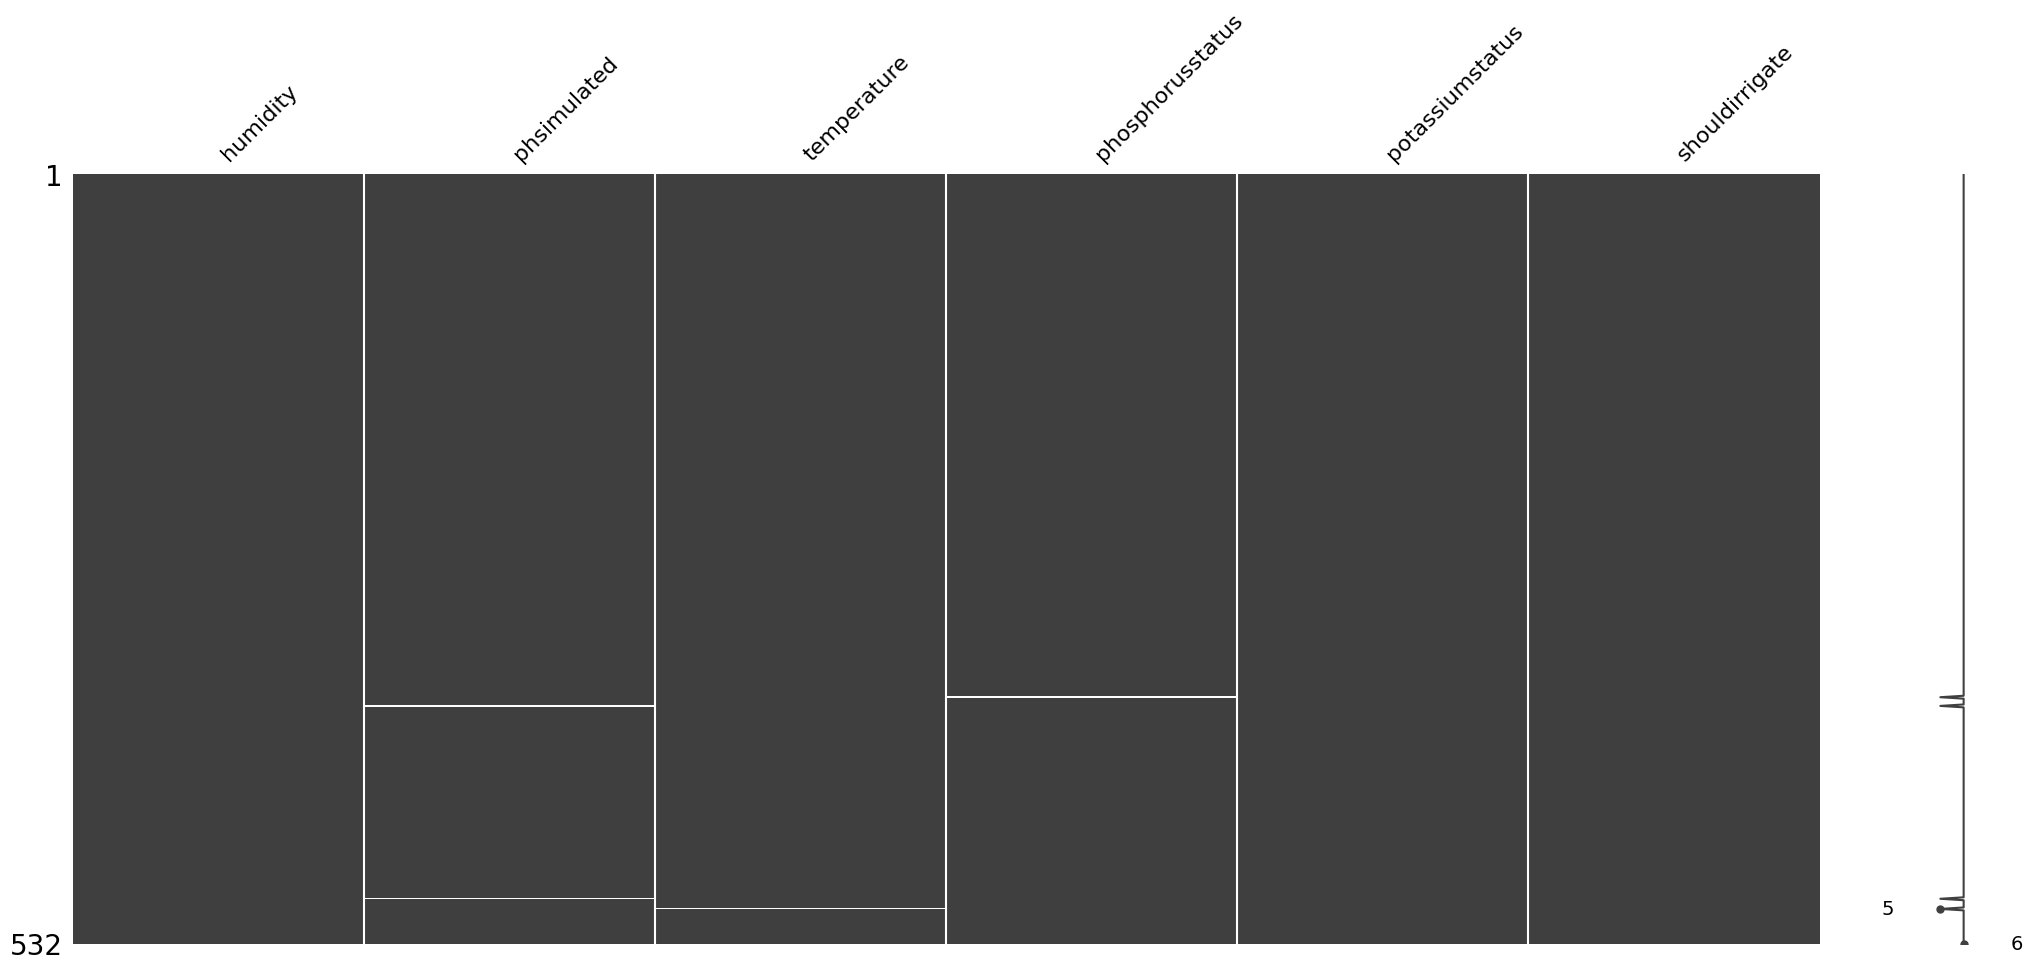

In [402]:
#Visualizar dados faltantes
mscno.matrix(df)

In [403]:
# Verificar a presença de dados duplicados
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 414


In [404]:
# Remover dados duplicados
if duplicates > 0:
    df = df.drop_duplicates()
    print("Dados duplicados removidos.")
else:   
    print("Nenhum dado duplicado encontrado.")

Dados duplicados removidos.


In [405]:
# Tranformar colunas categóricas em numéricas
le = LabelEncoder()
df["phosphorusstatus_enconder"] = le.fit_transform( df["phosphorusstatus"] )
df["potassiumstatus_enconder"] = le.fit_transform( df["potassiumstatus"] )

# Filtrar colunas relevantes
df.drop( columns=["phosphorusstatus", "potassiumstatus"] , inplace=True )
df.head()


,humidity,phsimulated,temperature,shouldirrigate,phosphorusstatus_enconder,potassiumstatus_enconder
0,0.0,3.42,80.0,1,1,1
20,0.0,3.42,-40.0,1,1,1
24,7.5,3.42,-25.9,1,1,1
28,31.0,3.42,-38.3,1,1,1
32,10.5,3.42,80.0,1,1,1


In [406]:
# Aplicando KNNImputer (substitui os valores ausentes usando os 5 vizinhos mais próximos)
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(df)
knn_imputed = pd.DataFrame(knn_imputed, columns=df.columns)

# Mostrar a quantidade de valores nulos em cada coluna
knn_imputed.isnull().sum()

humidity                     0
phsimulated                  0
temperature                  0
shouldirrigate               0
phosphorusstatus_enconder    0
potassiumstatus_enconder     0
dtype: int64

In [407]:
knn_imputed.head()

,humidity,phsimulated,temperature,shouldirrigate,phosphorusstatus_enconder,potassiumstatus_enconder
0,0.0,3.42,80.0,1.0,1.0,1.0
1,0.0,3.42,-40.0,1.0,1.0,1.0
2,7.5,3.42,-25.9,1.0,1.0,1.0
3,31.0,3.42,-38.3,1.0,1.0,1.0
4,10.5,3.42,80.0,1.0,1.0,1.0


In [408]:
# Separando features e labels
X = knn_imputed.drop('shouldirrigate', axis=1)
y = df['shouldirrigate']

# Aplicando StandardScaler
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)

df_new = pd.DataFrame(knn_imputed)

# Exporta os dados para arquivos
# Cria datafrade com X_scaled e y
df_new = pd.DataFrame(X_scaled, columns=X.columns)
df_new['shouldirrigate'] = y.values
# Exporta o dataframe para um arquivo CSV
df_new.to_csv("/Users/amanda/Documents/FIAP/projetos/chap1-phase4-agricultural-machine/documents/coletas-dados-normalizados.csv", index=False)

#Dividindo os dados em conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [409]:
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))

Acurácia KNN: 0.875


In [410]:
# DecisionTree
decisiontree = DecisionTreeClassifier(random_state=50)
decisiontree.fit(X_train, y_train)
y_decisiontree_predict = decisiontree.predict(X_test)
decisiontree_accuracy = accuracy_score(y_test, y_decisiontree_predict)
print(f"Acurácia Árvore de Decisão: {decisiontree_accuracy}")

Acurácia Árvore de Decisão: 1.0

In [411]:
#SVM
scale_svc = StandardScaler()

svc = SVC(kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train, y_train)
y_svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_svc_predict)
print(f"Acurácia do SVC: {svc_accuracy}")

Acurácia do SVC: 0.9166666666666666


In [412]:
# Random Forest
# A floresta aleatória (Random Forest) é um modelo baseado em múltiplas árvores de decisão que votam em conjunto para realizar a predição.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Acurácia da Random Forest:", accuracy_score(y_test, y_pred_rf))

Acurácia da Random Forest: 1.0


In [413]:
# Logistic Regression
# A Regressão Logística é um modelo estatístico clássico usado para classificação. Embora originalmente binária, ela pode ser adaptada para múltiplas classes, como no nosso caso. A seguir, aplicamos esse modelo para prever o tipo de produto agrícola a partir das condições de solo e clima.

logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_logreg))

Acurácia da Regressão Logística: 0.9583333333333334


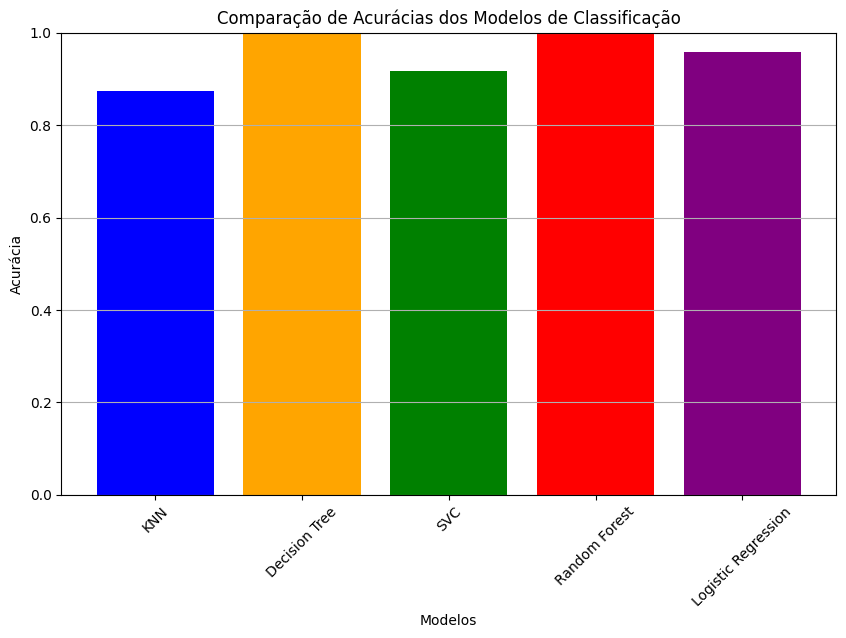

In [414]:
# Criar gráfico de barras para comparar as acurácias dos modelos
import matplotlib.pyplot as plt 
models = ['KNN', 'Decision Tree', 'SVC', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred_knn), decisiontree_accuracy, svc_accuracy, accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_logreg)] 
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácias dos Modelos de Classificação')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [415]:
## Usaremos nesse projeto o modelo de Decision Tree, pois ele apresentou a melhor acurácia.
# Salvar o modelo Decision Tree
joblib.dump(decisiontree, '/Users/amanda/Documents/FIAP/projetos/chap1-phase4-agricultural-machine/documents/decision_tree_model.pkl')

['/Users/amanda/Documents/FIAP/projetos/chap1-phase4-agricultural-machine/documents/decision_tree_model.pkl']